# Aprendizado Não-Supervisionado - Clustering de Ativos Big Tech

## Objetivo
O objetivo deste proejto é identificar padrões de comportamento entre diferentes empresas de tecnologia (Apple, Amazon, Google, Microsoft e Netflix) utilizando algoritmos de agrupamento. Queremos entender quais ativos se comportam de forma similar em termos de risco e retorno, independentemente de seus setores específicos.

## Etapas do Projeto
1. **Preparação dos Dados:** Carregamento e pivoteamento dos dados para comparar múltiplas empresas.
2. **Engenharia de Atributos (Feature Engineering):** Cálculo de métricas como Retorno Médio Diário e Volatilidade (Desvio Padrão).
3. **Pré-processamento:** Normalização dos dados (Scaling).
4. **Definição de Clusters:** Aplicação do Método do Cotovelo (Elbow Method) e Coeficiente de Silhueta.
5. **Execução do K-Means:** Agrupamento dos ativos.
6. **Visualização e Análise:** Interpretação dos clusters gerados.

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/big_tech_stock_prices.csv')
df.head()

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [4]:
df = df.pivot(index='date', columns='stock_symbol')
df.head()

open                                                      \
stock_symbol      AAPL       ADBE    AMZN        CRM       CSCO      GOOGL   
date                                                                         
2010-01-04    7.622500  36.650002  6.8125  18.652500  24.110001  15.689439   
2010-01-05    7.664286  37.040001  6.6715  18.612499  24.600000  15.695195   
2010-01-06    7.656429  37.330002  6.7300  18.687500  24.540001  15.662162   
2010-01-07    7.562500  37.410000  6.6005  18.629999  24.299999  15.250250   
2010-01-08    7.510714  36.750000  6.5280  18.517500  24.379999  14.814815   

                                                     ...      volume  \
stock_symbol         IBM       INTC META       MSFT  ...        CSCO   
date                                                 ...               
2010-01-04    125.411087  20.790001  NaN  30.620001  ...  59853700.0   
2010-01-05    125.889099  20.940001  NaN  30.850000  ...  45124500.0   
2010-01-06    124.933075  20.809999  NaN  30.879999  ...  35715700.0   
2010-01-07    124.158699  20.730000  NaN  30.629999  ...  31531200.0   
2010-01-08    123.393883  20.540001  NaN  30.280001  ...  39115900.0   

                                                                               \
stock_symbol        GOOGL        IBM        INTC META        MSFT        NFLX   
date                                                                            
2010-01-04     78169752.0  6438444.0  47800900.0  NaN  38409100.0  17239600.0   
2010-01-05    120067812.0  7156104.0  52357700.0  NaN  49749600.0  23753100.0   
2010-01-06    158988852.0  5863144.0  40037400.0  NaN  58182400.0  23290400.0   
2010-01-07    256315428.0  6109268.0  54041500.0  NaN  50559700.0   9955400.0   
2010-01-08    188783028.0  4390271.0  48234700.0  NaN  51197400.0   8180900.0   

                                           
stock_symbol        NVDA        ORCL TSLA  
date                                       
2010-01-04    80020400.0  26795000.0  NaN  
2010-01-05    72864800.0  28669900.0  NaN  
2010-01-06    64916800.0  24560700.0  NaN  
2010-01-07    54779200.0  30469700.0  NaN  
2010-01-08    47816800.0  23542400.0  NaN  

[5 rows x 84 columns]

In [ ]:
# Selecionando apenas os preços de fechamento
df_close = df['close']
df_close.head()

stock_symbol,AAPL,ADBE,AMZN,CRM,CSCO,GOOGL,IBM,INTC,META,MSFT,NFLX,NVDA,ORCL,TSLA
date,,,,,,,,,,,,,,
2010-01-04,7.643214,37.090000,6.6950,18.705000,24.690001,15.684434,126.625237,20.879999,NaN,30.950001,7.640000,4.6225,24.850000,NaN
2010-01-05,7.656429,37.700001,6.7345,18.625000,24.580000,15.615365,125.095604,20.870001,NaN,30.959999,7.358571,4.6900,24.820000,NaN
2010-01-06,7.534643,37.619999,6.6125,18.592501,24.420000,15.221722,124.282982,20.799999,NaN,30.770000,7.617143,4.7200,24.459999,NaN
2010-01-07,7.520714,36.889999,6.5000,18.510000,24.530001,14.867367,123.852776,20.600000,NaN,30.450001,7.485714,4.6275,24.379999,NaN
2010-01-08,7.570714,36.689999,6.6760,18.537500,24.660000,15.065566,125.095604,20.830000,NaN,30.660000,7.614286,4.6375,24.680000,NaN


In [6]:
# Verificando valores nulos
print(f'Total de valores nulos:\n{df_close.isnull().sum()}')

Total de valores nulos:
stock_symbol
AAPL      16
ADBE      16
AMZN      16
CRM       16
CSCO      16
GOOGL     16
IBM       16
INTC      16
META     599
MSFT      16
NFLX      16
NVDA      16
ORCL      16
TSLA     139
dtype: int64


In [7]:
df_close.shape

(3287, 14)

In [8]:
# Tratando valores nulos
df_clean = df_close.dropna()
df_clean.shape

(2672, 14)

In [9]:
# Transformando a série temporal em um DF de atributos estatísticos
# Cálculo de retornos diários
returns = df_clean.pct_change().dropna()

# Criando um DataFrame para armazenar as features
# Calculamos média e desvio padrão (volatilidade) dos retornos diários
features = pd.DataFrame({
    'Return': returns.mean() * 252,  # Anualizando a média dos retornos
    'Volatility': returns.std() * np.sqrt(252)  # Anualizando o desvio padrão
})

print(features)


                Return  Volatility
stock_symbol                      
AAPL          0.223846    0.290775
ADBE          0.273119    0.311818
AMZN          0.246699    0.322875
CRM           0.182145    0.347999
CSCO          0.132508    0.254902
GOOGL         0.203031    0.267932
IBM           0.000525    0.232759
INTC          0.047172    0.304738
META          0.189185    0.401287
MSFT          0.234804    0.267630
NFLX          0.438680    0.491445
NVDA          0.461164    0.437343
ORCL          0.141100    0.253844
TSLA          0.555866    0.567279


### Normalização (StandardScaler)

Como a volatilidade e o retorno podem estar em escalas diferentes, o K-Means pode dar peso indevido à variável com valores numericamente maiores. Aplicaremos o `StandardScaler` para garantir que ambas as colunas tenham média $0$ e variância $1$.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalonando os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

[[-0.09367505 -0.50686638]
 [ 0.23602216 -0.28784585]
 [ 0.05924044 -0.17275715]
 [-0.3727142   0.08873903]
 [-0.70484697 -0.88023282]
 [-0.23295679 -0.74462087]
 [-1.58798252 -1.11070641]
 [-1.27585731 -0.36152982]
 [-0.32560595  0.64337542]
 [-0.02035472 -0.7477609 ]
 [ 1.34383851  1.58175852]
 [ 1.49428632  1.01864702]
 [-0.64735513 -0.89124742]
 [ 2.12796123  2.37104764]]


In [11]:
# Convertendo de volta para DataFrame
scaled_features_df = pd.DataFrame(scaled_features, index=features.index, columns=features.columns)
print(scaled_features_df)

                Return  Volatility
stock_symbol                      
AAPL         -0.093675   -0.506866
ADBE          0.236022   -0.287846
AMZN          0.059240   -0.172757
CRM          -0.372714    0.088739
CSCO         -0.704847   -0.880233
GOOGL        -0.232957   -0.744621
IBM          -1.587983   -1.110706
INTC         -1.275857   -0.361530
META         -0.325606    0.643375
MSFT         -0.020355   -0.747761
NFLX          1.343839    1.581759
NVDA          1.494286    1.018647
ORCL         -0.647355   -0.891247
TSLA          2.127961    2.371048


### Aplicação do Método do Cotovelo (_Elbow Method_)

Para encontrar o número de clusters (`K`), aplicaremos o _Elbow Method_.

In [13]:
# importando KMeans
from sklearn.cluster import KMeans

# Função para calcular WCSS
def calculate_wcss(data):
    wcss = []
    for n in range(1, 15):
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    return wcss

# Calculando WCSS
wcss = calculate_wcss(scaled_features_df)

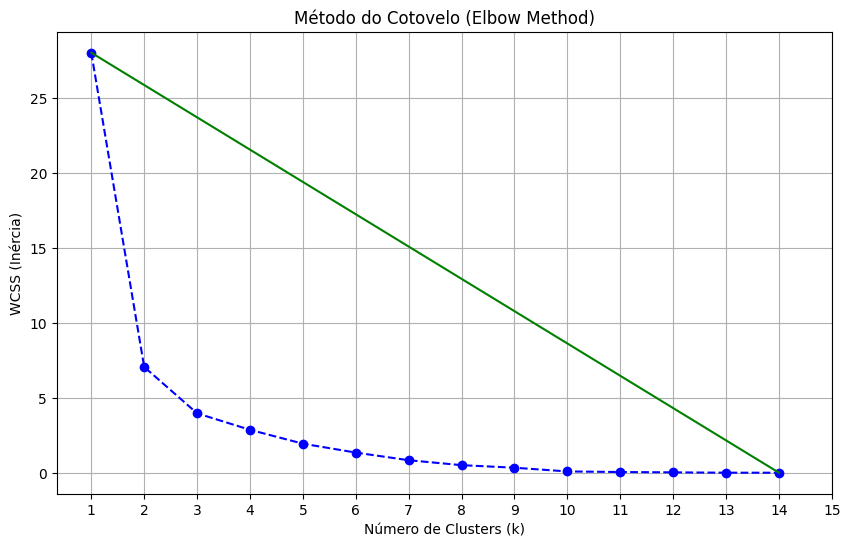

In [30]:
# Visualizando o cotovelo
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--', color='b')
plt.plot([1,14], [wcss[0], wcss[-1]], linestyle='-', color='g')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inércia)')
plt.xticks(range(1, 16))
plt.grid()
plt.show()

### Análise do Gráfico

O ponto que indica o $k$ ideal é o ponto da curva de maior distância perpendicular em relação à reta traçado entre o primeiro e último pontos. Analisando visualmente o gráfico, podemos dizer que é o ponto $3$, no entanto, temos uma fórmula para confirmar se estamos corretos.

$$distance(P_0, P_1, (x, y)) = \frac{|(y_1 - y_0)x - (x_1 - x_0)y + x_1y_0 - y_1x_0|}{\sqrt{(y_1 - y_0)^2 + (x_1 - x_0)^2}}$$

Transcrevendo a fórmula para código, temos:

In [35]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 15, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

Agora que já sabemos calcular o $k$, podemos aplicar o K-Means.

In [36]:
# Calculando o número ótimo de clusters
optimal_k = optimal_number_of_clusters(wcss)

# Treinando o KMeans com o número ótimo de clusters
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(scaled_features_df)

# Adicionando os labels ao DataFrame original de features para facilitar a interpretação dos valores reais
features['Cluster'] = cluster_labels

### Visualização dos Grupos

Um gráfico de dispersão é a melhor forma de ver como os ativos foram separados no espaço de Retorno vs. Volatilidade.

C:\Users\jopim\AppData\Local\Temp\ipykernel_18896\902972933.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features.Return[i],
C:\Users\jopim\AppData\Local\Temp\ipykernel_18896\902972933.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features.Volatility[i],


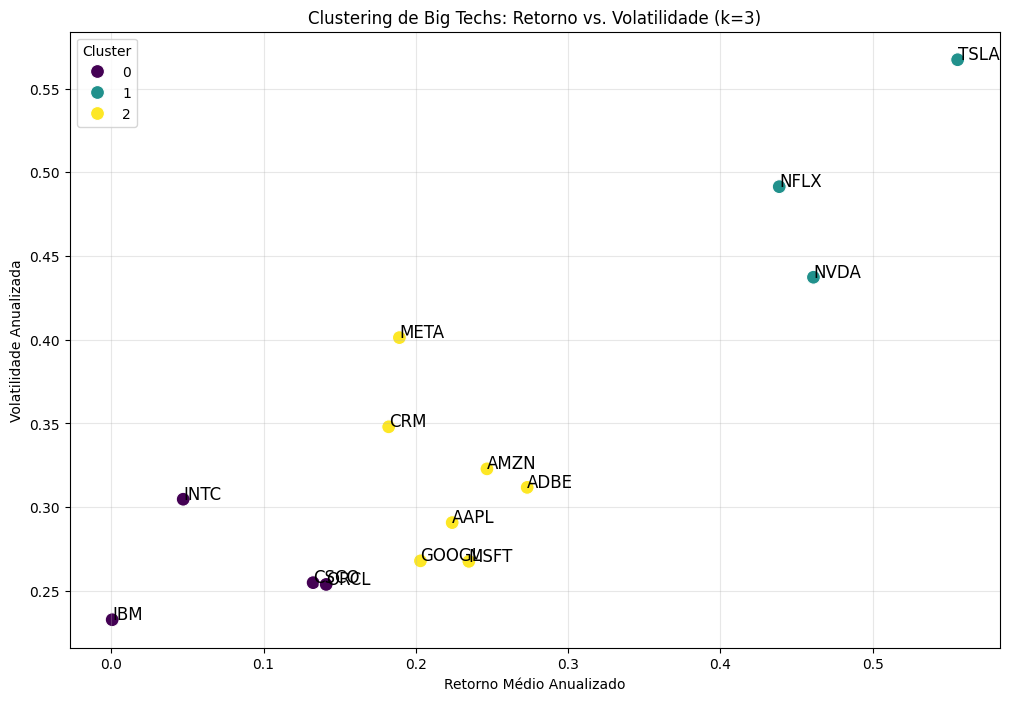

In [37]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=features, 
    x='Return', 
    y='Volatility', 
    hue='Cluster', 
    palette='viridis', 
    s=100
)

# Adicionando os nomes das empresas aos pontos
for i in range(features.shape[0]):
    plt.text(
        features.Return[i], 
        features.Volatility[i], 
        features.index[i], 
        fontsize=12
    )

plt.title('Clustering de Big Techs: Retorno vs. Volatilidade (k=3)')
plt.xlabel('Retorno Médio Anualizado')
plt.ylabel('Volatilidade Anualizada')
plt.grid(True, alpha=0.3)
plt.show()